# Mark Galperin - HW3.
# Due October 14, 2020

*Please note that a **single** PDF file will be the only document that you turn in, which will include your answers to the problems with corresponding derivations and any code used to complete the problems. When including the code, please make sure you also include **code outputs**, and you don't need to include example code. Problems and deliverables that should be included with your submission are shown in **bold**.*

*This Juputer Notebook file serves as a template for you to start homework, since we recommend to finish the homework using Jupyter Notebook. You can start with this notebook file with your local Jupyter environment, or upload it to Google Colab. You can include all the code and other deliverables in this notebook Jupyter Notebook supports $\LaTeX$ for math equations, and you can export the whole notebook as a PDF file. But this is not the only option, if you are more comfortable with other ways, feel free to do so, as long as you can submit the homework in a single PDF file.*

***

In [1]:
import sympy as sym
from sympy import Function, Eq, Matrix, simplify
import numpy as np
import matplotlib.pyplot as plt

Below are the help functions in previous homeworks, which you may need for this homework.

## Problem 1 (10pts)

Let $f:\mathbb{R}^2\to\mathbb{R}$ with $f(x,y)=-\cos(x+y)\cos(x-y)$.  Show that $(x,y)=(0,0)$ satisfies both the necessary and sufficient conditions to be a local minimizer of $f$.

*Hint 1: You will need to take the first- and second-order derivative of $f$ with respect to $[x,y]$.*

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, then you just need to include a copy of code and the code outputs, with notes that explain why the code outputs indicate the necessary and sufficient conditions.**

In [2]:
#symbols...
x = sym.symbols('x')
y = sym.symbols('y')
f_sym = sym.symbols('f')
H_sym = sym.symbols('H')

In [3]:
#define f...
f = -sym.cos(x+y)*sym.cos(x-y)
print("f is defined...")
display(Eq(f_sym,f))

f is defined...


Eq(f, -cos(x - y)*cos(x + y))

In [4]:
#define the hessian H...
d2fdx = f.diff(x).diff(x)
d2fdxy = f.diff(x).diff(y)
d2fdy = f.diff(y).diff(y)

H = Matrix(([d2fdx, d2fdxy],[d2fdxy, d2fdy]))
print("The Hessian:")
display(H)

The Hessian:


Matrix([
[-2*sin(x - y)*sin(x + y) + 2*cos(x - y)*cos(x + y),                                                 0],
[                                                 0, 2*sin(x - y)*sin(x + y) + 2*cos(x - y)*cos(x + y)]])

In [5]:
H_zero = H.subs([(x,0),(y,0)])
print('The Hessian at (x,y) = (0,0)')
display(H_zero)

The Hessian at (x,y) = (0,0)


Matrix([
[2, 0],
[0, 2]])

Because H at (0,0) is _positive definite_ , otherwise stated $x^{T}Hx > 0 \: \forall \: x \in R^{n}$, (0,0) satisfies the condition of locally minimizing f

## Problem 2 (20pts)

Compute the equations of motion for the two-mass-spring system (shown above) in $\theta=(\theta_1,\theta_2)$ coordinates. The first mass with mass $m_1$ is the one close to the wall, and the second mass is with mass $m_2$. Assume that there is a spring of spring constant $k_1$ between the first mass and the wall and a spring of spring constant $k_2$ between the first mass and the second mass.

**Turn in: A copy of the code used to symbolically solve for the equations of motion, also include the outputs of the code, which should be the equations of motion.**

In [6]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/twolinearmasses.png' width=500' height='350'></table>"))

In [7]:
#symbol definitions...
t = sym.symbols('t')
L = sym.symbols('L')
x1_sym = sym.symbols('x_1')
x2_sym = sym.symbols('x_2')
KE_sym = sym.symbols('KE')
V_sym = sym.symbols('V')
th1 = sym.Function('θ_1')(t)
th2 = sym.Function('θ_2')(t)
m1 = sym.symbols('m_1')
m2 = sym.symbols('m_2')
k1 = sym.symbols('k_1')
k2 = sym.symbols('k_2')

In [8]:
#x1 and x2...
x1 = L*sym.tan(th1)
x2 = L*sym.tan(th1+th2) - L*sym.tan(th1)

#display..
print("expressions for x1 and x2")
display(Eq(x1_sym,x1),Eq(x2_sym,x2))

expressions for x1 and x2


Eq(x_1, L*tan(θ_1(t)))

Eq(x_2, L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t)))

In [9]:
#derivatives...
dx1 = x1.diff(t)
ddx1 = dx1.diff(t)
dx2 = x2.diff(t)
ddx2 = dx2.diff(t)

I'll be solving for the Equations of motion via Lagrangian mechanics

In [10]:
#defining KE and V...
KE = (1/2)*m1*(dx1)**2 + (1/2)*m2*(dx1+ddx2)**2
V = k1*(x1)**2+k2*(x2)**2

print("Kinetic and Potenrial energies, respectively:")
display(Eq(KE_sym,KE),Eq(V_sym,V))

Kinetic and Potenrial energies, respectively:


Eq(KE, 0.5*L**2*m_1*(tan(θ_1(t))**2 + 1)**2*Derivative(θ_1(t), t)**2 + 0.5*m_2*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), t) - L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), (t, 2)))**2)

Eq(V, L**2*k_1*tan(θ_1(t))**2 + k_2*(L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t)))**2)

In [11]:
#Defining the Lagrangian...
#L = simplify(KE -V)
L = (KE -V)

print("The Lagrangian:")
display(L)

The Lagrangian:


-L**2*k_1*tan(θ_1(t))**2 + 0.5*L**2*m_1*(tan(θ_1(t))**2 + 1)**2*Derivative(θ_1(t), t)**2 - k_2*(L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t)))**2 + 0.5*m_2*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), t) - L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), (t, 2)))**2

In [12]:
#define configuration vector q, and qdot = dq/dt
q = Matrix([th1, th2])
qdot = q.diff(t)

print('The configuration vector and its derivative:')
display(q,qdot)

The configuration vector and its derivative:


Matrix([
[θ_1(t)],
[θ_2(t)]])

Matrix([
[Derivative(θ_1(t), t)],
[Derivative(θ_2(t), t)]])

In [13]:
#taking the dervative of L with respect to q via Jacobian...
L_mat = Matrix([L])
dLdq = L_mat.jacobian(q)

#...and with respect qdot...
dLdqdot = L_mat.jacobian(qdot)

print('dL/dq and dL/dq-dot, respectively: ')
display(dLdq.T,dLdqdot.T)

dL/dq and dL/dq-dot, respectively: 


Matrix([
[-L**2*k_1*(2*tan(θ_1(t))**2 + 2)*tan(θ_1(t)) + 1.0*L**2*m_1*(tan(θ_1(t))**2 + 1)*(2*tan(θ_1(t))**2 + 2)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 - k_2*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1) - 2*L*(tan(θ_1(t))**2 + 1))*(L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t))) + 0.5*m_2*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), t) - L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), (t, 2)))*(4*L*(tan(θ_1(t) + θ_2(t))**2 + 1)**2*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2 + 4*L*(2*tan(θ_1(t) + θ_2(t))**2 + 2)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t))**2 + 2*L*(2*tan(θ_1(t) + θ_2(t))**2 + 2)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2)))*tan(θ_1(t) + θ_2(t)) - 4*L*(tan(θ_1(t))**2 + 1)**2*Derivative(θ_1(t)

Matrix([
[1.0*L**2*m_1*(tan(θ_1(t))**2 + 1)**2*Derivative(θ_1(t), t) + 0.5*m_2*(4*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(2*Derivative(θ_1(t), t) + 2*Derivative(θ_2(t), t))*tan(θ_1(t) + θ_2(t)) - 8*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t) + 2*L*(tan(θ_1(t))**2 + 1))*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), t) - L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), (t, 2)))],
[                                                                                                                                                         2.0*L*m_2*(tan(θ_1(t) + θ_2(t))**2 + 1)*(2*Derivative(θ_1(t), t) + 2*Derivative(θ_2(t), t))*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(t

In [14]:
#TODO:improve display

#putting together the Euler-Lagrange equations...
EL_vec = dLdq - dLdqdot.diff(t)

#separating for better display...
EL_th1 = sym.Eq(EL_vec[0],0)
EL_th2 = sym.Eq(EL_vec[1],0)

print('The Euler-Lagrange Equations:')
display(EL_th1,EL_th2)

The Euler-Lagrange Equations:


Eq(-L**2*k_1*(2*tan(θ_1(t))**2 + 2)*tan(θ_1(t)) - 4.0*L**2*m_1*(tan(θ_1(t))**2 + 1)**2*tan(θ_1(t))*Derivative(θ_1(t), t)**2 - 1.0*L**2*m_1*(tan(θ_1(t))**2 + 1)**2*Derivative(θ_1(t), (t, 2)) + 1.0*L**2*m_1*(tan(θ_1(t))**2 + 1)*(2*tan(θ_1(t))**2 + 2)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 - k_2*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1) - 2*L*(tan(θ_1(t))**2 + 1))*(L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t))) - 0.5*m_2*(4*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(2*Derivative(θ_1(t), t) + 2*Derivative(θ_2(t), t))*tan(θ_1(t) + θ_2(t)) - 8*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t) + 2*L*(tan(θ_1(t))**2 + 1))*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)**2*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**3 + 4*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**3*tan(θ_1(t) + θ_2(t))**2 + 2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2)))*tan(θ_1(t) + θ_2(t)) + 2*L*(tan(θ_1(t) + θ_2(t))**2 + 1

Eq(-2*L*k_2*(L*tan(θ_1(t) + θ_2(t)) - L*tan(θ_1(t)))*(tan(θ_1(t) + θ_2(t))**2 + 1) - 2.0*L*m_2*(tan(θ_1(t) + θ_2(t))**2 + 1)**2*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*(2*Derivative(θ_1(t), t) + 2*Derivative(θ_2(t), t))*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), t) - L*(tan(θ_1(t))**2 + 1)*Derivative(θ_1(t), (t, 2))) - 4.0*L*m_2*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*(2*Derivative(θ_1(t), t) + 2*Derivative(θ_2(t), t))*(2*L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))**2*tan(θ_1(t) + θ_2(t)) + L*(tan(θ_1(t) + θ_2(t))**2 + 1)*(Derivative(θ_1(t), (t, 2)) + Derivative(θ_2(t), (t, 2))) - 2*L*(tan(θ_1(t))**2 + 1)*tan(θ_1(t))*Derivative(θ_1(t), t)**2 + L*

In [15]:
#wrapping my lhs and rhs as matrices 
lhs = Matrix([EL_vec[0], EL_vec[1]])
rhs = Matrix([0, 0])

# define the equations
eqn = Eq(lhs, rhs)

In [16]:
#defining dθ1, dθ2 and ddθ1, ddθ2...
th1dot = th1.diff(t)
th2dot = th2.diff(t)
th1ddot = th1dot.diff(t)
th2ddot = th2dot.diff(t)

In [17]:
#solving for ddθ1 and ddθ2...
q = Matrix([th1ddot, th2ddot])
#soln = sym.solve(eqn, q, dict=True) # this will return the solution 
                                     # as a Python dictionary
#ELsolve = []
#for sol in soln:
#    print('solution: ')
#    for v in q:
#        bloop = sym.Eq(v, sol[v])
#        ELsolve.append(sol[v])
#        #ELsolve.append(bloop)
#        display(bloop)

## Problem 3 (10pts)

For the same two-spring-mass system in Problem 2, show by example that Newton's equations do not hold in an arbitrary choice of coordinates (but they do, of course, hold in Cartesian coordinates). Your example should be implemented using Python's SymPy package.

*Hint 1: In other words, you need to find a set of coordinates $q=[q_1,q_2]$, and compute the equations of motion ($F=ma=m\ddot{q}$), showing that these equations of motion do not make the same prediction as Newton's laws in the Cartesian inertially fixed frame (where they are correct).*

*Hint 2: Newton's equations don't hold in non-inertia coordinates. For the $x_1,x_2$ and $y_1,y_2$ coordinates shown in the image, one of them is non-inertia coordinate.*

**Turn in: A copy of code you used to symbolically compute the equations of motion to show that Newton's equations don't hold. Also, include the output of the code, which should be the equations of motion under the chosen set of coordinates (indicate what coordinate you choose in the comments).**

In [18]:
#Computing the 

## Problem 4 (10pts)

For the same double-pendulum system hanging in gravity in Homework 2, take $q=[\theta_1, \theta_2]$ as the system configuration variables, with $R_1=R_2=1, m_1=m_2=1$. Symbolically compute the Hamiltonian of this system using Python's SymPy package.

**Turn in: A copy of the code used to symbolically compute the Hamiltonian of the system, also include the output of the code, which should the Hamiltonian of the system.**

In [19]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dyndoublepend.png' width=500' height='350'></table>"))

In [20]:
#symbol definitions...
t = sym.symbols('t')
g = sym.symbols('g')
R1 = sym.symbols('R1')
R2 = sym.symbols('R2')
m1 = sym.symbols('m_{1}')
m2 = sym.symbols('m_{2}')

#Angular position, velocity, and acceleration as functions of t...
th1 = Function(r'θ_1')(t)
th2 = Function(r'θ_2')(t)

In [21]:
#expressions for positions of the two masses
x1 = R1*sym.sin(th1)
y1 = -R1*sym.cos(th1)
x2 = x1 + R2*sym.sin(th1+th2)
y2 = y1 - R2*sym.cos(th1+th2)

print("Position expressions (x1,y1,x2,y2 respectively):")
display(x1,y1,x2,y2)

Position expressions (x1,y1,x2,y2 respectively):


R1*sin(θ_1(t))

-R1*cos(θ_1(t))

R1*sin(θ_1(t)) + R2*sin(θ_1(t) + θ_2(t))

-R1*cos(θ_1(t)) - R2*cos(θ_1(t) + θ_2(t))

In [22]:
#Velocity expressions
x1dot = x1.diff(t)
x2dot = x2.diff(t)
y1dot = y1.diff(t)
y2dot = y2.diff(t)

In [23]:
#KE and V expressions...
KE = (1/2)*m1*((x1dot)**2+(y1dot)**2) + (1/2)*m2*((x2dot)**2+(y2dot)**2)
V  = m1*g*(y1+R1) + m2*g*(y2+R1+R2) #At theta = 0, my values for y1 and y2 are negative. 
                                    #Positive y points away from the fulcrum of the pendulum
#Display
print('Kinetic Energy:')
display(KE)
print('Potential Energy:')
display(V)

Kinetic Energy:


0.5*m_{1}*(R1**2*sin(θ_1(t))**2*Derivative(θ_1(t), t)**2 + R1**2*cos(θ_1(t))**2*Derivative(θ_1(t), t)**2) + 0.5*m_{2}*((R1*sin(θ_1(t))*Derivative(θ_1(t), t) + R2*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*sin(θ_1(t) + θ_2(t)))**2 + (R1*cos(θ_1(t))*Derivative(θ_1(t), t) + R2*(Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*cos(θ_1(t) + θ_2(t)))**2)

Potential Energy:


g*m_{1}*(-R1*cos(θ_1(t)) + R1) + g*m_{2}*(-R1*cos(θ_1(t)) + R1 - R2*cos(θ_1(t) + θ_2(t)) + R2)

In [24]:
#The Lagrangian, L
L = KE - V

print('The Lagrangian:')
display(sym.simplify(L))

The Lagrangian:


0.5*R1**2*m_{1}*Derivative(θ_1(t), t)**2 + R1*g*m_{1}*(cos(θ_1(t)) - 1) + g*m_{2}*(R1*cos(θ_1(t)) - R1 + R2*cos(θ_1(t) + θ_2(t)) - R2) + 0.5*m_{2}*(R1**2*Derivative(θ_1(t), t)**2 + 2*R1*R2*cos(θ_2(t))*Derivative(θ_1(t), t)**2 + 2*R1*R2*cos(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + R2**2*Derivative(θ_1(t), t)**2 + 2*R2**2*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + R2**2*Derivative(θ_2(t), t)**2)

using the Lagrangian to define the hamiltonian...

In [25]:
#define configuration vector q, and qdot = dq/dt
q = Matrix([th1, th2])
qdot = q.diff(t)

#taking the dervative of L with respect to q via Jacobian...
L_mat = Matrix([L])
p = L_mat.jacobian(qdot) #p = dL/dq

#display
print('Generalized momentum, p')
display(simplify(p.T)) 

Generalized momentum, p


Matrix([
[R1**2*m_{1}*Derivative(θ_1(t), t) + m_{2}*(R1**2*Derivative(θ_1(t), t) + 2*R1*R2*cos(θ_2(t))*Derivative(θ_1(t), t) + R1*R2*cos(θ_2(t))*Derivative(θ_2(t), t) + R2**2*Derivative(θ_1(t), t) + R2**2*Derivative(θ_2(t), t))],
[                                                                                                                1.0*R2*m_{2}*(R1*cos(θ_2(t))*Derivative(θ_1(t), t) + R2*Derivative(θ_1(t), t) + R2*Derivative(θ_2(t), t))]])

In [26]:
H = (p*qdot)[0] - L

print('The Hamiltonian:')
display(sym.simplify(H))

The Hamiltonian:


0.5*R1**2*m_{1}*Derivative(θ_1(t), t)**2 + 0.5*R1**2*m_{2}*Derivative(θ_1(t), t)**2 + 1.0*R1*R2*m_{2}*cos(θ_2(t))*Derivative(θ_1(t), t)**2 + 1.0*R1*R2*m_{2}*cos(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) - 1.0*R1*g*m_{1}*cos(θ_1(t)) + 1.0*R1*g*m_{1} - 1.0*R1*g*m_{2}*cos(θ_1(t)) + 1.0*R1*g*m_{2} + 0.5*R2**2*m_{2}*Derivative(θ_1(t), t)**2 + 1.0*R2**2*m_{2}*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + 0.5*R2**2*m_{2}*Derivative(θ_2(t), t)**2 - 1.0*R2*g*m_{2}*cos(θ_1(t) + θ_2(t)) + 1.0*R2*g*m_{2}

## Problem 5 (10pts)

Simulate the double-pendulum system in Problem 4 with initial condition $\theta_1=\theta_2=-\frac{\pi}{2}, \dot{\theta}_1=\dot{\theta}_2=0$ for $t\in[0,10]$ and $dt=0.01$. Numerically evaluate the Hamiltonian of this system from the simulated trajectory, and plot it.

*Hint 1: The Hamiltonian can be numerically evaluated as a function of $\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2$, which means for each time step in the simulated trajectory, you can compute the Hamiltonian for this time step, and store it in a list or array for plotting later. This doesn't need to be done during the numerical simulation, after you have the simulated the trajectory you can access each time step within another loop.*

**Turn in: A copy of the code used to numerically evaluate and plot the Hamiltonian, also include the output of the code, which should be the plot of Hamiltonian.**

first I need to solve for the equations of motion...

In [27]:
#putting together the Euler-Lagrange equations...
dLdqdot = L_mat.jacobian(qdot)
EL_vec = p - dLdqdot.diff(t) #E/L eqns statement

#wrapping my lhs and rhs as matrices 
lhs = Matrix([EL_vec[0], EL_vec[1]])
rhs = Matrix([0, 0])

# define the equations
eqn = Eq(lhs, rhs)

#defining dθ1, dθ2 and ddθ1, ddθ2...
th1dot = th1.diff(t)
th2dot = th2.diff(t)
th1ddot = th1dot.diff(t)
th2ddot = th2dot.diff(t)

In [28]:
#solving for ddθ1 and ddθ2...
q = Matrix([th1ddot, th2ddot])
soln = sym.solve(eqn, q, dict=True) # this will return the solution 
                                     # as a Python dictionary
ELsolve = []

for sol in soln:
    print('solution: ')
    for v in q:
        bloop = sym.Eq(v, sol[v])
        ELsolve.append(sol[v])
        #ELsolve.append(bloop)
        #display(bloop) #use for faster display
        display(sym.simplify(bloop))

solution: 


Eq(Derivative(θ_1(t), (t, 2)), (R1*m_{1}*Derivative(θ_1(t), t) - R1*m_{2}*sin(2*θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t)/2 - R1*m_{2}*cos(2*θ_2(t))*Derivative(θ_1(t), t)/2 + R1*m_{2}*Derivative(θ_1(t), t)/2 + R2*m_{2}*sin(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + R2*m_{2}*sin(θ_2(t))*Derivative(θ_2(t), t)**2)/(R1*(m_{1} + m_{2}*sin(θ_2(t))**2)))

Eq(Derivative(θ_2(t), (t, 2)), (R1**2*m_{1}*sin(θ_2(t))*Derivative(θ_1(t), t) + R1**2*m_{2}*sin(θ_2(t))*Derivative(θ_1(t), t) + R1*R2*m_{1} - 0.5*R1*R2*m_{2}*sin(2.0*θ_2(t))*Derivative(θ_2(t), t) - 0.5*R1*R2*m_{2}*cos(2.0*θ_2(t)) + 0.5*R1*R2*m_{2} - R2**2*m_{2}*sin(θ_2(t))*Derivative(θ_1(t), t) - R2**2*m_{2}*sin(θ_2(t))*Derivative(θ_2(t), t))*Derivative(θ_2(t), t)/(R1*R2*(m_{1} + m_{2}*sin(θ_2(t))**2)))

Substitutions and lamdifying...

In [29]:
#plugging in constant values m1 = 1, m2 = 2, R1 = 2, R2 = 1
th1ddot_sub = ELsolve[0].subs([(m1,1),(m2,1),(R1,1),(R2,1),(g,9.8)])
th2ddot_sub = ELsolve[1].subs([(m1,1),(m2,1),(R1,1),(R2,1),(g,9.8)])
H_sub = H.subs([(m1,1),(m2,1),(R1,1),(R2,1),(g,9.8)])

#display: substituted epressions...
print('substituted expressions...')
display(Eq(th1ddot,th1ddot_sub),Eq(th2ddot,th2ddot_sub), Eq(sym.symbols('H'),H_sub))

#function-izing the substituted equations with lambdify...
th1ddot_func = sym.lambdify([[th1, th2, th1dot, th2dot]], th1ddot_sub)
th2ddot_func = sym.lambdify([[th1, th2, th1dot, th2dot]], th2ddot_sub)
H_func = sym.lambdify([[th1, th2, th1dot, th2dot]], H_sub)


substituted expressions...


Eq(Derivative(θ_1(t), (t, 2)), (sin(θ_1(t) - θ_2(t))*cos(θ_1(t) + θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) - sin(θ_1(t))*cos(θ_1(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + sin(θ_2(t))**2*Derivative(θ_1(t), t) + sin(θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + sin(θ_2(t))*Derivative(θ_2(t), t)**2 + Derivative(θ_1(t), t))/(sin(θ_2(t))**2 + 1))

Eq(Derivative(θ_2(t), (t, 2)), (sin(θ_2(t))*Derivative(θ_1(t), t) - sin(θ_2(t))*Derivative(θ_2(t), t) - 0.5*sin(2.0*θ_2(t))*Derivative(θ_2(t), t) - 0.5*cos(2.0*θ_2(t)) + 1.5)*Derivative(θ_2(t), t)/(sin(θ_2(t))**2 + 1))

Eq(H, 0.5*(2*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*sin(θ_1(t) + θ_2(t)) + sin(θ_1(t))*Derivative(θ_1(t), t))*sin(θ_1(t) + θ_2(t)) + 2*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*cos(θ_1(t) + θ_2(t)) + cos(θ_1(t))*Derivative(θ_1(t), t))*cos(θ_1(t) + θ_2(t)))*Derivative(θ_2(t), t) - 0.5*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*sin(θ_1(t) + θ_2(t)) + sin(θ_1(t))*Derivative(θ_1(t), t))**2 - 0.5*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*cos(θ_1(t) + θ_2(t)) + cos(θ_1(t))*Derivative(θ_1(t), t))**2 + (0.5*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*sin(θ_1(t) + θ_2(t)) + sin(θ_1(t))*Derivative(θ_1(t), t))*(2*sin(θ_1(t) + θ_2(t)) + 2*sin(θ_1(t))) + 0.5*((Derivative(θ_1(t), t) + Derivative(θ_2(t), t))*cos(θ_1(t) + θ_2(t)) + cos(θ_1(t))*Derivative(θ_1(t), t))*(2*cos(θ_1(t) + θ_2(t)) + 2*cos(θ_1(t))) + 1.0*sin(θ_1(t))**2*Derivative(θ_1(t), t) + 1.0*cos(θ_1(t))**2*Derivative(θ_1(t), t))*Derivative(θ_1(t), t) - 0.5*sin(θ_1(t))**2*Derivative(θ_1(t), t)**2 - 9.8*co

Numerical Simulation...

In [30]:
##########################################################################
# Below is an example of how to implement a new integration
# function and use it for simulation

##########################################################################
# This is the same "simulate()" function we provided
# in previous homework. 
def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 

##########################################################################
# This is the same "integrate()" function we provided in previous homework.
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

##########################################################################
# This is where you implement your new integration function for this 
# problem. Please make sure the new integration function has the same
# input-output structure as the old one.
def new_integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    pass # you can start your implementation here

##########################################################################
# In this example, we're going to simulate a particle falling in gravity,
# and assume that we already have the equations of motion (which you have
# to use Euler-Lagrange equations to solve for in the homework, but you 
# should have that in last homework) 
import numpy as np

def dyn(s):
    return np.array([s[2],s[3], th1ddot_func([s[0],s[1],s[2],s[3]]),th2ddot_func([s[0],s[1],s[2],s[3]])])

In [31]:
##########################################################################
# We first use the old integration function to simulate the system, please
# carefully read the comments inside the "simulate()" function

# note that, here I pass the function arguments explicitly using the so-called 
# *keyword arguments*. It's not necessary, as long as the order of the arguments 
# are correct, you don't have to explicitly write down the keyword names. When 
# calling the function explicitly through keyword arguments, we have "integrate=integrate", 
# the first "integrate" indicates the argument name (you can see it in function definition), 
# and the second "integrate" is the name of the provided integration function. 
# You can also call the function as: "traj = simulate(dyn, s0, [0,10], 0.01, integrate)", 
# where "integrate" indicates the provided integration function name.

In [32]:
# define initial condition
s0 = np.array([-np.pi/2,-np.pi/2,0,0])

#simulate
traj = simulate(f=dyn, x0=s0, tspan=[0,10], dt=0.01, integrate=integrate) 
print('shape of traj: ', traj.shape)

shape of traj:  (4, 1000)


Now I'll get the hamiltonian over time using the trajectory...

In [33]:
#initializing
Htraj = np.zeros((1,traj.shape[1]))

#looping over the columns of traj...
for col in range(traj.shape[1]):
    Htraj[0][col] = H_func([traj[0][col],traj[1][col],traj[2][col],traj[3][col]])

Hamiltonian over time:


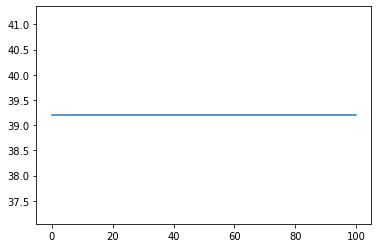

In [34]:
#plotting...
plt.plot(np.arange(1000)*0.1,Htraj[0:2].T)

print('Hamiltonian over time:')
plt.show()

## Problem 6 (15pts)

In the previously provided code for simulation, the numerical integration is a forth-order Runge–Kutta integration. Now, write down your own numerical integration function using Euler's method, and use your numerical integration function to simulate the same double-pendulum system with same parameters and initial condition in Problem 4. Compute and plot the Hamiltonian from the simulated trajectory, what's the difference between two plots?

*Hint 1: You will need to implement a new {\tt integrate()} function. This function takes in three inputs: a function $f(x)$ representing the dynamics of the system state $x$ (you can consider it as $\dot{x}=f(x)$), current state $x$ (for example $x(t)$ if $t$ is the current time step), and integration step length $dt$. This function should output $x(t+dt)$, for which the analytical solution is $x(t+dt) = x(t) + \int_t^{t+dt} f(x(\tau)) d\tau$. Thus, you need to think about how to numerically evaluate this integration using Euler's method.*

*Hint 2: The implemented function should have the same input-output structure as the previous one.*

*Hint 3: After you implement the new integration function, you can use the same helper function {\tt simulate()} for simulation. You just need to input replace the integration function name as the new one (for example, your new function can be named as "euler_integrate()"). Please carefully read the comments in the {\tt simulate()} function. Below is the template/example of how to implement the new integration function and use it for simulation.*

**Turn in: A copy of you numerical integration function (you only need to include the code for your new integration function), and the resulting plot of Hamiltonian.**

In [35]:
##########################################################################
# This is where you implement your new integration function for this 
# problem. Please make sure the new integration function has the same
# input-output structure as the old one.
def new_integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    #for my new integration, I'm repurposing the runge-kutta syntax, 
    #since euler's method is a 1st-order runge-kutta
    k1 = dt * f(xt)
    new_xt = xt + k1
    
    return new_xt


In [36]:
#simulate...
traj_new = simulate(f=dyn, x0=s0, tspan=[0,10], dt=0.01, integrate=new_integrate) 

In [37]:
#initializing
Htraj_new = np.zeros((1,traj_new.shape[1]))

#looping over the columns of traj...
for col in range(traj_new.shape[1]):
    Htraj_new[0][col] = H_func([traj_new[0][col],traj_new[1][col],traj_new[2][col],traj_new[3][col]])

Hamiltonian over time:


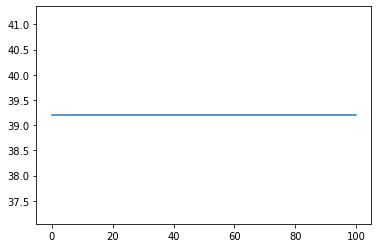

In [38]:
#plotting...
plt.plot(np.arange(1000)*0.1,Htraj[0:2].T)

print('Hamiltonian over time:')
plt.show()

## Problem 7 (20pts)

For the same double-pendulum you simulated in Problem 4 with same parameters and initial condition, now add a constraint to the system such that the distance between the second pendulum and the origin is fixed at $\sqrt{2}$. Simulate the system with same parameters and initial condition, and animate the system with the same animate function provided in homework 2.

*Hint 1: What do you think the equations of motion should look like? Think about how the system will behave after adding the constraint. With no double, you can solve this problem using $\phi$ and all the following results for constrained Euler-Lagrange equations, however, if you really understand this constrained system, things might be much easier, and you can actually treat it as an unconstrained system.*

**Turn in: A copy of code used to numerically evaluate, simulate and animate the system. Also, upload the video of animation separately through Canvas, the video should be in ".mp4" format, and you can use screen capture or record the screen directly with your phone.**

## Problem 8 (5pts)

For the same system with same constraint in Problem 6, simulate the system with initial condition $\theta_1=\theta_2=-\frac{\pi}{4}$, which actually violates the constraint! Simulate the system and see what happen, what do you think is the actual influence after adding this constraint?

**Turn in: Your thoughts about the actual effect of the constraint in this system (you don't need to include any code for this problem).**